Evaluation of the pretrained model for question t02

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data.sampler import SubsetRandomSampler

from classes import CustomImageDataset
from classes import CustomDataLoader
from classes import model1
from classes import train_model
from classes import evaluate_model


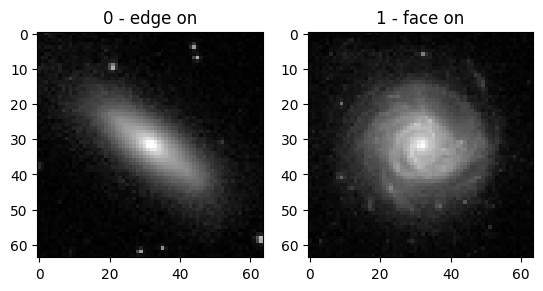

In [3]:
PATH =  r"C:\Users\ZenBook\Desktop\machine_learning\t02_net.pth"
net = model1()
net.load_state_dict(torch.load(PATH))

csv_annotations_file = r"t02.csv"
annotations_file=pd.read_csv(csv_annotations_file)

img_dir=r"images"

t02_galaxies = CustomImageDataset (annotations_file , img_dir)

ap_0=0
ap_1=0

plt.figure(1)

for i in range(len(t02_galaxies)):

   image, label= t02_galaxies.__getitem__(i)

   if label == 0 and ap_0 == 0:
        plt.subplot(1, 2, 1)
        plt.imshow(  image.permute(1, 2, 0), cmap='gray'  )
        plt.title('0 - edge on')
        ap_0 += 1

   if label == 1 and ap_1 == 0:
      plt.subplot(1, 2, 2)
      plt.imshow(  image.permute(1, 2, 0), cmap='gray'  )
      plt.title('1 - face on')
      ap_1 += 1

   if ap_0 == 1 and ap_1 == 1 :
      break

In [2]:
t02_data_loader = CustomDataLoader(32, 0.2, 0.2, t02_galaxies)

train_loader = t02_data_loader.train_loader()
validation_loader=t02_data_loader.validation_loader()
test_loader = t02_data_loader.test_sampler()

evaluate_model(net, validation_loader  )

Accuracy of the network on the validation/test images: 95 %
